In [1]:
import numpy as np
import matplotlib.pyplot as plt

Código usado para gerar a Figura 8.1

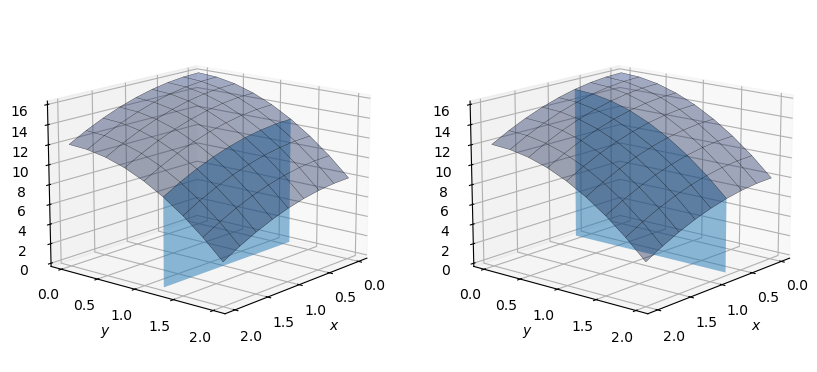

In [2]:
from matplotlib.collections import PolyCollection

f = lambda x,y: 16- x**2 - 2*y**2

dx=0.25
dy=0.25
x = np.arange(0,2+dx,dx)
y = np.arange(0,2+dx,dy)
xi, yi = np.meshgrid(x, y)
z = f(xi,yi)


fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(1,2,1,projection='3d')
y0 = 1.25
verts1 = np.vstack((x,f(x,y0))).T
verts1 = np.insert(verts1, [0,len(verts1)], [(x[0],0),(x[-1],0)], axis=0)
poly = PolyCollection([verts1], alpha=.5)
ax.add_collection3d(poly, zs=[y0], zdir='y')
# plota superficie
ax.plot_surface(xi, yi, f(xi,yi),color='royalblue', alpha=0.4)
ax.plot_wireframe(xi, yi, f(xi,yi), color='k',lw=0.2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlim(0, z.max())
ax.view_init(15,40)


ax = fig.add_subplot(1,2,2,projection='3d')
x0 = 0.75
verts2 = np.vstack((x,f(x0,y))).T
verts2 = np.insert(verts2, [0,len(verts2)], [(y[0],0),(y[-1],0)], axis=0)
poly = PolyCollection([verts2], alpha=.5)
ax.add_collection3d(poly, zs=[x0], zdir='x')
# plota superficie
ax.plot_surface(xi, yi, f(xi,yi),color='royalblue', alpha=0.4)
ax.plot_wireframe(xi, yi, f(xi,yi), color='k',lw=0.2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlim(0, z.max())
ax.view_init(15,40)

In [3]:
# cálculo das alturas z = f(x,y)
f = lambda x,y: 16- x**2 - 2*y**2

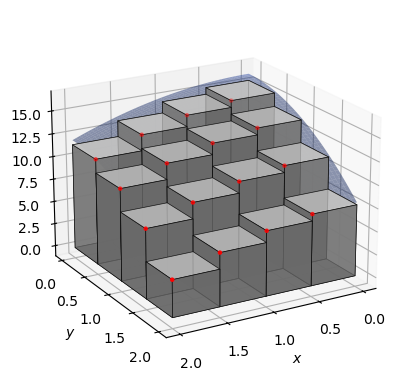

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# espaçamento (EXPERIMENTE MUDAR OS VALORES dx E dy)
dx=0.5; dy=0.5

# # caixas
xi, yi = np.meshgrid(np.arange(0,2,dx), np.arange(0,2,dy))
x =  xi.ravel(); y =  yi.ravel()
z = f(x+dx,y+dx)

z0 = np.full(z.shape, 0)
ax.bar3d(x, y, z0, dx, dy, z, 
         color='whitesmoke', alpha=0.8,
         edgecolor='k', linewidth=0.5)

# superficie
xs, ys = np.meshgrid(np.linspace(0,2), np.linspace(0,2))
ax.plot_surface(xs, ys, f(xs,ys),
                color='royalblue', alpha=0.5)

# pontos
ax.scatter(x+dx,y+dx, z, color='r', marker=".")

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.view_init(20,60)
plt.savefig('riemann.png',bbox_inches='tight', pad_inches=0)
plt.grid()

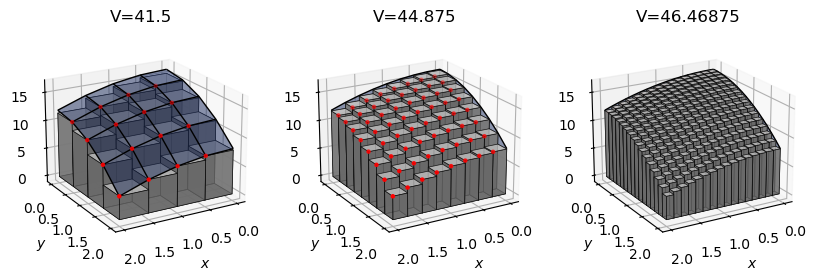

In [5]:
def plota_integ_2d(ax, f,xmin,xmax,ymin,ymax,dx,dy):
    #cria a malha
    x = np.arange(xmin, xmax+dx, dx)
    y = np.arange(ymin, ymax+dy, dy)
    xi, yi = np.meshgrid(x, y)
    
    # define a função
    x =  xi[1:,1:].ravel()
    y =  yi[1:,1:].ravel()
    z = f(x,y)
    z0 = np.full(z.shape, 0)

    ax.bar3d(x-dx, y-dy, z0, dx, dy, z, 
             color='whitesmoke', alpha=0.8,
             edgecolor='k', linewidth=0.5 )

    # calcula volume
    V = np.sum(f(xi[1:,1:],yi[1:,1:]))*dx*dy
    
    # plota superficie
    ax.plot_surface(xi, yi, f(xi,yi),color='royalblue', alpha=0.5)
    ax.plot_wireframe(xi, yi, f(xi,yi), color='k',lw=1.0)
    ax.scatter(x, y, z, color='r', marker=".")
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.view_init(20,60)
    plt.title('V='+str(V))
    plt.grid()
    return ax

f = lambda x,y: 16- x**2 - 2*y**2

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,3,1,projection='3d')
plota_integ_2d(ax, f,0,2,0,2,0.5,0.5)

ax = fig.add_subplot(1,3,2,projection='3d')
plota_integ_2d(ax, f,0,2,0,2,0.25,0.25)

ax = fig.add_subplot(1,3,3,projection='3d')
plota_integ_2d(ax, f,0,2,0,2,0.125,0.125)

plt.show()

(0.0, 20.0)

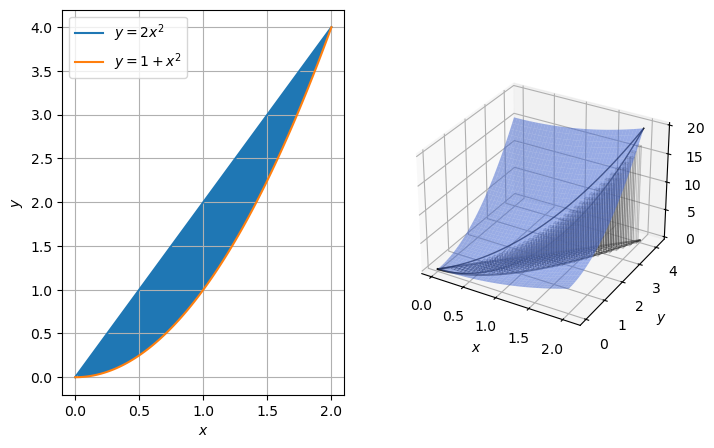

In [6]:
x = np.linspace(0,2,100)
y1 = 2*x
y2 = x**2

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,2,1)

plt.plot(x,y1, label='$y=2x^2$')
plt.plot(x,y2, label='$y=1+x^2$')
plt.fill_between(x, y1, y2, where=y2<y1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.legend()
plt.grid()



ax = fig.add_subplot(1,2,2,projection='3d')

#cria a malha
dx = 0.05
dy = 0.1
x = np.arange(0, 2+dx, dx)
y = np.arange(0, 4+dy, dy)
xi, yi = np.meshgrid(x, y)
zi = xi**2+yi**2

x =  xi.ravel()
y =  yi.ravel()
z = x**2+y**2
z = np.where(np.logical_and(y>x**2,y<2*x),z,np.nan)

z0 = np.full(z.shape, 0)

ax.bar3d(x+dx, y+dy, z0, dx, dy, z, 
         color='whitesmoke', alpha=0.1,
         edgecolor='k', linewidth=0.5 )

# plota superficie
ax.plot_surface(xi, yi, zi,color='royalblue', alpha=0.5)

x = np.arange(0, 2+dx, dx)
y = np.arange(0, 4+dy, dy)
y1 = 2*x
y2 = x**2
ax.plot(x, y1, y1*0, color='k', alpha=0.5)
ax.plot(x, y2, y2*0, color='k', alpha=0.5)
ax.plot(x, y1, x**2+y1**2, color='k', alpha=0.7, linewidth=1)
ax.plot(x, y2, x**2+y2**2, color='k', alpha=0.7, linewidth=1)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_zlim(zi.min(), zi.max())